In [ ]:
# Implement the Continuous Bag of Words (CBOW) Model. Stages can be:
# a . Data preparation
# b. Generate training data
# c. Train model
# d. Output

In [53]:
import numpy as np
import re
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda 
#%pip install seaborn
import seaborn as sns

# A.Data Preparation

In [54]:
data="""I love to play football",
    "Football is a great game",
    "I enjoy watching football matches",
    "The team played well",
    "Football brings people together"""

In [55]:
sentences = data.split('.')
sentences


['I love to play football",\n    "Football is a great game",\n    "I enjoy watching football matches",\n    "The team played well",\n    "Football brings people together']

In [56]:
clean_sent=[]
for sentence in sentences:
    if sentence=="":
        continue
    #remove spacial character
    sentence = re.sub('[^A-Za-z0-9]+', ' ', (sentence))
    #remove 1 letter words
    sentence = re.sub(r'(?:^| )\w (?:$| )', ' ', (sentence)).strip()
    #lower all character
    sentence = sentence.lower()
    clean_sent.append(sentence)

clean_sent

['i love to play football football is a great game i enjoy watching football matches the team played well football brings people together']

In [57]:
#Tokenization: create a tokenizer and fit it on your cleaned sentences (clean_sent). This generates the word index.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_sent)
sequences = tokenizer.texts_to_sequences(clean_sent)
print(sequences)

[[2, 3, 4, 5, 1, 1, 6, 7, 8, 9, 2, 10, 11, 1, 12, 13, 14, 15, 16, 1, 17, 18, 19]]


In [58]:
#Building Word Index Dictionaries: create mappings between indices and words.

index_to_word = {}
word_to_index = {}

for i, sequence in enumerate(sequences):
#     print(sequence)
    word_in_sentence = clean_sent[i].split()   # Split sentence into words
#     print(word_in_sentence)
    
    for j, value in enumerate(sequence):
        index_to_word[value] = word_in_sentence[j]
        word_to_index[word_in_sentence[j]] = value

print(index_to_word, "\n")
print(word_to_index)

{2: 'i', 3: 'love', 4: 'to', 5: 'play', 1: 'football', 6: 'is', 7: 'a', 8: 'great', 9: 'game', 10: 'enjoy', 11: 'watching', 12: 'matches', 13: 'the', 14: 'team', 15: 'played', 16: 'well', 17: 'brings', 18: 'people', 19: 'together'} 

{'i': 2, 'love': 3, 'to': 4, 'play': 5, 'football': 1, 'is': 6, 'a': 7, 'great': 8, 'game': 9, 'enjoy': 10, 'watching': 11, 'matches': 12, 'the': 13, 'team': 14, 'played': 15, 'well': 16, 'brings': 17, 'people': 18, 'together': 19}


# B.Generate Training Data

In [59]:
# Calculate the vocabulary size and define the embedding size and context size for your CBOW model.

vocab_size = len(tokenizer.word_index) + 1
emb_size = 10
context_size = 2
# construct the contexts and their corresponding targets. The contexts consist of words surrounding the target word
contexts = []
targets = []

for sequence in sequences:
    for i in range(context_size, len(sequence) - context_size):
        target = sequence[i]
        context = [sequence[i - 2], sequence[i - 1], sequence[i + 1], sequence[i + 2]]
#         print(context)
        contexts.append(context)
        targets.append(target)
print(contexts, "\n")
print(targets)

[[2, 3, 5, 1], [3, 4, 1, 1], [4, 5, 1, 6], [5, 1, 6, 7], [1, 1, 7, 8], [1, 6, 8, 9], [6, 7, 9, 2], [7, 8, 2, 10], [8, 9, 10, 11], [9, 2, 11, 1], [2, 10, 1, 12], [10, 11, 12, 13], [11, 1, 13, 14], [1, 12, 14, 15], [12, 13, 15, 16], [13, 14, 16, 1], [14, 15, 1, 17], [15, 16, 17, 18], [16, 1, 18, 19]] 

[4, 5, 1, 1, 6, 7, 8, 9, 2, 10, 11, 1, 12, 13, 14, 15, 16, 1, 17]


In [60]:
#printing context words and the target words for a clear understanding of the input-output pairs.
for i in range(5):
    words = []
    target = index_to_word.get(targets[i])
    for j in contexts[i]:
        words.append(index_to_word.get(j))
    print(words," -> ", target)


['i', 'love', 'play', 'football']  ->  to
['love', 'to', 'football', 'football']  ->  play
['to', 'play', 'football', 'is']  ->  football
['play', 'football', 'is', 'a']  ->  football
['football', 'football', 'a', 'great']  ->  is


In [61]:
# Convert the contexts and targets to numpy arrays
X = np.array(contexts)
Y = np.array(targets)


# C. Train model

In [62]:
#build the CBOW model

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=emb_size, input_length=2*context_size),
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(vocab_size, activation='softmax')
])


/home/pdea/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [63]:
#Train the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X, Y, epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 925ms/step - accuracy: 0.1579 - loss: 2.9951
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2105 - loss: 2.9884
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2105 - loss: 2.9821
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.2105 - loss: 2.9755
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2105 - loss: 2.9681
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2105 - loss: 2.9597
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2105 - loss: 2.9501
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2105 - loss: 2.9392
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2105 - loss: 2.9268
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2105 - loss: 2.9129


# D.Output(model prediction)

In [65]:
# Example prediction
def predict_word(model, context):
    context = np.array(context).reshape(1, -1)  # Reshape for the model
    predictions = model.predict(context)
    return index_to_word[np.argmax(predictions)]
# Testing with an example context
example_context = [1, 2, 3, 4]  # Replace with actual context indices
predicted_word = predict_word(model, example_context)
print(f'Predicted word: {predicted_word}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted word: football


<Axes: >

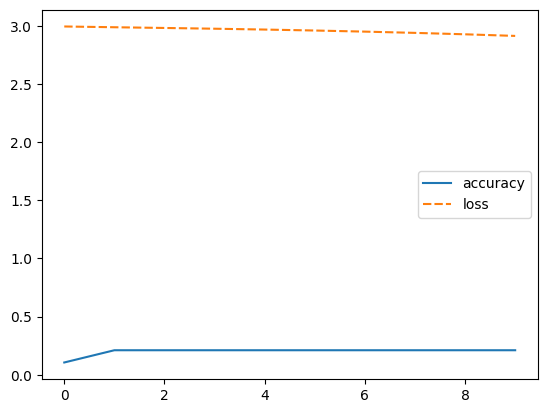

In [47]:
#optional

sns.lineplot(model.history.history)